## Implementing Simple Chatbot using LangGraph


In [3]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [7]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey i am Himanshu and i like to play football")

AIMessage(content="<think>\nOkay, the user introduced himself as Himanshu and mentioned he likes to play football. I should respond in a friendly and engaging way. First, acknowledge his name and his interest in football. Maybe ask a follow-up question to encourage conversation. Let's see, what do people usually talk about regarding football? Positions they play, favorite teams, how long they've been playing, or maybe goals they want to achieve. I should keep the tone positive and supportive. Also, make sure to use an emoji to keep it friendly. Let me put that together.\n</think>\n\nHey Himanshu! 👋 Nice to meet you! I love that you play football—what position do you usually play? Forward, defender, or maybe goalkeeper? 🏆 And do you have a favorite team or player you look up to? Let me know if you want to chat more about the beautiful game! ⚽😄", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 186, 'prompt_tokens': 20, 'total_tokens': 206, 'completion_time':

## We Will Start With Creating Nodes

In [8]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state["messages"])]}

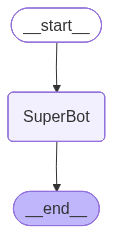

In [10]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)

## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder=graph.compile(checkpointer=memory)

## Display
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
## Invocation

config ={"configurable":{"thread_id":"1"}}
graph_builder.invoke({"messages":"Hey i am Himanshu and i like to play football"},config=config)

{'messages': [HumanMessage(content='Hey i am Himanshu and i like to play football', additional_kwargs={}, response_metadata={}, id='b0ebdeaf-9af2-464e-bd70-a25c37ef39f3'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Himanshu and mentioned they like to play football. I should acknowledge their introduction and express interest in their hobby. Maybe ask them about their favorite team or position if they play. I can also invite them to share more about their experiences with football. Let me keep the tone friendly and engaging. I need to make sure the response is positive and encourages further conversation. Also, check for any typos or errors before sending.\n</think>\n\nHi Himanshu! Nice to meet you! 😊 Football is an awesome sport—do you play it casually or on a team? What position do you usually play? I'd love to hear more about your experiences with the game! ⚽", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens

## Create a thread

In [14]:
config = {"configurable":{"thread_id":"2"}}

for chunk in graph_builder.stream({"messages":"Hi my name is himanshu Rathore and i like to play football"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Himanshu Rathore and mentioned he likes to play football. I need to respond in a friendly and engaging way.\n\nFirst, I should acknowledge his introduction. Then, maybe ask a question to encourage further conversation. Since he mentioned football, I can ask about his position or team. But maybe start with a more general question to keep it open. Also, maybe add a positive note about football to show enthusiasm. Let me check for any errors in the response. Make sure the tone is approachable and not too formal. Keep it simple and conversational. Yeah, that should work.\n</think>\n\nHello Himanshu! Nice to meet you! 🤝 Football is such an amazing sport—do you have a favorite position to play, or any particular team you're into? I'd love to hear more about your experience with it! ⚽", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 182, 'prompt_tokens': 23, 'total_tokens

In [15]:
config = {"configurable":{"thread_id":"3"}}

for chunk in graph_builder.stream({"messages":"Hi my name is himanshu Rathore and i like to play football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is himanshu Rathore and i like to play football', additional_kwargs={}, response_metadata={}, id='c1cf9680-ca30-480a-b8fc-82645dc5b38f')]}
{'messages': [HumanMessage(content='Hi my name is himanshu Rathore and i like to play football', additional_kwargs={}, response_metadata={}, id='c1cf9680-ca30-480a-b8fc-82645dc5b38f'), AIMessage(content="<think>\nOkay, the user is Himanshu Rathore and he mentioned he likes to play football. Let me start by greeting him and acknowledging his interest. I should ask him how he got into football to show interest. Maybe he plays on a team, so I can ask if he's part of one. I'm curious about his role on the team, like forward, defender, etc. It's good to ask what he enjoys most about playing, whether it's teamwork, strategy, or something else. I should also mention if he's into any specific aspects of the game like training or watching matches. Keep the conversation friendly and open-ended to encourage him to

In [ ]:
config = {"configurable":{"thread_id":"2"}}

for chunk in graph_builder.stream({"messages":"i also like  play football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is himanshu Rathore and i like to play football', additional_kwargs={}, response_metadata={}, id='1c7f5363-b8c2-43c0-a2b9-bc173edceb45'), AIMessage(content="<think>\nOkay, the user introduced himself as Himanshu Rathore and mentioned he likes to play football. I need to respond in a friendly and engaging way.\n\nFirst, I should acknowledge his introduction. Then, maybe ask a question to encourage further conversation. Since he mentioned football, I can ask about his position or team. But maybe start with a more general question to keep it open. Also, maybe add a positive note about football to show enthusiasm. Let me check for any errors in the response. Make sure the tone is approachable and not too formal. Keep it simple and conversational. Yeah, that should work.\n</think>\n\nHello Himanshu! Nice to meet you! 🤝 Football is such an amazing sport—do you have a favorite position to play, or any particular team you're into? I'd love to hear

In [19]:
for chunk in graph_builder.stream({"messages":"i love sports"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is himanshu Rathore and i like to play football', additional_kwargs={}, response_metadata={}, id='1c7f5363-b8c2-43c0-a2b9-bc173edceb45'), AIMessage(content="<think>\nOkay, the user introduced himself as Himanshu Rathore and mentioned he likes to play football. I need to respond in a friendly and engaging way.\n\nFirst, I should acknowledge his introduction. Then, maybe ask a question to encourage further conversation. Since he mentioned football, I can ask about his position or team. But maybe start with a more general question to keep it open. Also, maybe add a positive note about football to show enthusiasm. Let me check for any errors in the response. Make sure the tone is approachable and not too formal. Keep it simple and conversational. Yeah, that should work.\n</think>\n\nHello Himanshu! Nice to meet you! 🤝 Football is such an amazing sport—do you have a favorite position to play, or any particular team you're into? I'd love to hear

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [ ]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)
    